In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Тренировочный тест 1

In [37]:
data = pd.DataFrame(columns=['location', 'town', 'mortality', 'hardness'])
with open('water.txt', 'r') as file:
    for index, line in enumerate(file):
        if index > 0:
            line_splitted = line.split()
            if len(line_splitted) > 4:
                line_splitted[1] = line_splitted[1] + line_splitted[2]
                line_splitted.remove(line_splitted[2])
            data.loc[index, :] = line_splitted

In [38]:
data

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,WestBromwich,1627,53
59,South,WestHam,1486,122
60,South,Wolverhampton,1485,81


Постройте 95% доверительный интервал для средней годовой смертности в больших городах.

In [42]:
data['mortality'] = data['mortality'].astype(int)

In [66]:
mu = data['mortality'].mean()
sigma = data['mortality'].std(ddof=1) / np.sqrt(data['mortality'].shape[0])

In [50]:
from statsmodels.stats.weightstats import _tconfint_generic

In [68]:
round(_tconfint_generic(mu, sigma, 60, 0.05, 'two-sided')[0], 4)

1476.0833

Для южных городов

In [70]:
south = data.loc[data['location'] == 'South', 'mortality']

In [72]:
mu = south.mean()
sigma = south.std(ddof=1)

In [73]:
_tconfint_generic(mu, sigma / np.sqrt(south.shape[0]), south.shape[0] - 1, 0.05, 'two-sided')

(1320.1517462936238, 1433.463638321761)

In [74]:
north = data.loc[data['location'] != 'South', 'mortality']

In [75]:
mu = north.mean()
sigma = north.std(ddof=1)

In [76]:
_tconfint_generic(mu, sigma / np.sqrt(north.shape[0]), north.shape[0] - 1, 0.05, 'two-sided')

(1586.5605251961385, 1680.6394748038613)

Жесткость

In [79]:
north_hard = (data.loc[data['location'] != 'South', 'hardness']).astype(int)
south_hard = (data.loc[data['location'] == 'South', 'hardness']).astype(int)

In [80]:
mu_n, mu_s = north_hard.mean(), south_hard.mean()
sigma_n, sigma_s = north_hard.std(ddof=1), south_hard.std(ddof=1)

In [81]:
# north
_tconfint_generic(mu_n, sigma_n / np.sqrt(north.shape[0]), north.shape[0] - 1, 0.05, 'two-sided')

(21.42248728572426, 39.37751271427574)

In [82]:
# south

_tconfint_generic(mu_s, sigma_s / np.sqrt(south.shape[0]), south.shape[0] - 1, 0.05, 'two-sided')

(53.467198692036106, 86.07126284642544)

In [84]:
19.6 ** 2

384.1600000000001

## Тренировочный тест 2

In [10]:
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion

In [113]:
from scipy import stats, optimize
from sys import float_info

In [109]:
alpha = 0.05
count = np.asarray(1)
nobs = np.asarray(50)

q_ = count * 1. / nobs
alpha_2 = 0.5 * alpha

std_ = np.sqrt(q_ * (1 - q_) / nobs)
dist = stats.norm.isf(alpha / 2.) * std_
ci_low = q_ - dist
ci_upp = q_ + dist

In [110]:
ci_low

-0.018805307081790987

In [114]:
# inverting the binomial test
def func(qi):
    return stats.binom_test(q_ * nobs, nobs, p=qi) - alpha
if count == 0:
    ci_low = 0
else:
    ci_low = optimize.brentq(func, float_info.min, q_)
if count == nobs:
    ci_upp = 1
else:
    ci_upp = optimize.brentq(func, q_, 1. - float_info.epsilon)

In [117]:
ci_low

0.0010253398672239338

In [97]:
proportion_confint(1, 50, method='normal')

(0.0, 0.05880530708179099)

In [88]:
proportion_confint(1, 50, alpha=0.05, method='wilson')

(0.003539259271646236, 0.10495443589637815)

In [98]:
size = 50
data_gen = np.zeros(size)
data_gen[0] = 1
data_gen

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
proportion_confint(sum(data_gen), len(data_gen), method='normal')

(0.0, 0.05880530708179099)

In [119]:
samplesize_confint_proportion(proportion=0.02, half_length=0.01, alpha=0.05, method='normal')

752.9259288560489

In [120]:
proportions = np.linspace(0.005, 1, num=100)
sizes = [samplesize_confint_proportion(proportion, half_length=0.01, alpha=0.05, method='normal') for proportion in proportions]

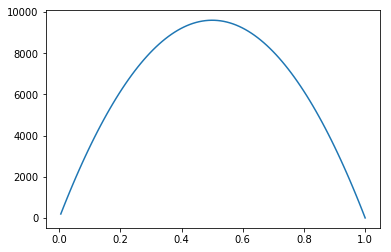

In [121]:
plt.plot(proportions, sizes)

In [ ]:
max(sizes)

## Тест "Доверительные интервалы"

In [60]:
from scipy.stats import norm

In [61]:
norm.ppf(0.9985)

2.9677379253417944

In [11]:
proportion_confint(104, 11037, method='wilson')

(0.007783358288966079, 0.011403717226138864)

In [12]:
proportion_confint(189, 11034, method='wilson')

(0.014870523663224692, 0.01972332878929014)

In [15]:
(189 / 11034) - (104 / 11037)

0.0077060239760047815

In [16]:
0.01972332878929014 - 0.011403717226138864

0.008319611563151275

In [63]:
def proportions_confint(sample_1, sample_2, alpha):
    p1 = sum(sample_1) / len(sample_1)
    p2 = sum(sample_2) / len(sample_2)
    z = norm.ppf(1 - alpha / 2)
    step = np.sqrt(p1 * (1 - p1) / len(sample_1) + p2 * (1 - p2) / len(sample_2))
    
    c_l = (p1 - p2) - z * step
    c_u = (p1 - p2) + z * step
    return (c_l, c_u)

In [83]:
proportions_confint(placebo, aspirin, 0.05)

(0.004687750675049439, 0.010724297276960124)

In [17]:
def odds(p):
    return p / (1 - p)

In [21]:
odds_a = odds(104 / 11037)
odds_a

0.009512485136741973

In [22]:
odds_p = odds(189 / 11034)
odds_p

0.017427385892116183

In [62]:
odds_p /odds_a

1.8320539419087138

Бутстреп

In [43]:
np.random.seed(0)

In [74]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    return data[indices]

In [45]:
def calculate_odds(sample):
    p = sum(sample) / len(sample)
    return p / (1 - p)

In [48]:
def stat_intervals(stat, alpha):
    return np.percentile(stat, [100 * alpha / 2, 100 * (1 - alpha / 2)])

In [46]:
aspirin = np.concatenate((np.ones(104), np.zeros(11037-104)))

In [47]:
placebo = np.concatenate((np.ones(189), np.zeros(11034-189)))

In [79]:
np.random.seed(0)
odds_placebo = [calculate_odds(sample) for sample in get_bootstrap_samples(placebo, 1000)]
odds_aspirin = [calculate_odds(sample) for sample in get_bootstrap_samples(aspirin, 1000)]

In [81]:
odds_relation = [p / a for p, a in zip(odds_placebo, odds_aspirin)]

In [80]:
len(odds_placebo)

1000

In [82]:
stat_intervals(odds_relation, 0.05)

array([1.46286276, 2.35093673])